In [1]:
import numpy as np
import torch
from trixi.util import Config
import matplotlib.pyplot as plt
from experiment import BaselineExperiment, ToyDataset
from util import plot_dependency_map

%load_ext autoreload
%autoreload 2


# Test with toy dataset


In [2]:
# define config
c = Config()
c.batch_size = 10
c.n_epochs = 50
c.learning_rate = 0.001
if torch.cuda.is_available():
    c.use_cuda = True
else:
    c.use_cuda = False
c.rnd_seed = 2
c.log_interval = 10


In [3]:
exp = BaselineExperiment(config=c, name='experiment_baseline', n_epochs=c.n_epochs,
                         seed=c.rnd_seed, base_dir='./experiment_dir',
                         loggers={"visdom": ["visdom", {"exp_name": "myenv"}]})


Process Process-1:
Traceback (most recent call last):
  File "/home/m167k/miniconda3/envs/torchenv/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
  File "/home/m167k/miniconda3/envs/torchenv/lib/python3.7/site-packages/multiprocess/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/m167k/git_repos/trixi/trixi/logger/visdom/numpyvisdomlogger.py", line 92, in __show
    func, args, kwargs = queue.get()
  File "/home/m167k/miniconda3/envs/torchenv/lib/python3.7/site-packages/multiprocess/queues.py", line 97, in get
    res = self._recv_bytes()
  File "/home/m167k/miniconda3/envs/torchenv/lib/python3.7/site-packages/multiprocess/connection.py", line 219, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/m167k/miniconda3/envs/torchenv/lib/python3.7/site-packages/multiprocess/connection.py", line 410, in _recv_bytes
    buf = self._recv(4)
  File "/home/m167k/miniconda3/envs/torchenv/lib/pytho

Config:
{
    "base_dir": "./experiment_dir",
    "batch_size": 10,
    "learning_rate": 0.001,
    "log_interval": 10,
    "n_epochs": 50,
    "name": "experiment_baseline",
    "rnd_seed": 2,
    "seed": 2,
    "use_cuda": true
}
Experiment set up.


INFO:default-i3mqYQlcRo:Config:
INFO:default-i3mqYQlcRo:{
    "base_dir": "./experiment_dir",
    "batch_size": 10,
    "learning_rate": 0.001,
    "log_interval": 10,
    "n_epochs": 50,
    "name": "experiment_baseline",
    "rnd_seed": 2,
    "seed": 2,
    "use_cuda": true
}
INFO:default-i3mqYQlcRo:Experiment set up.


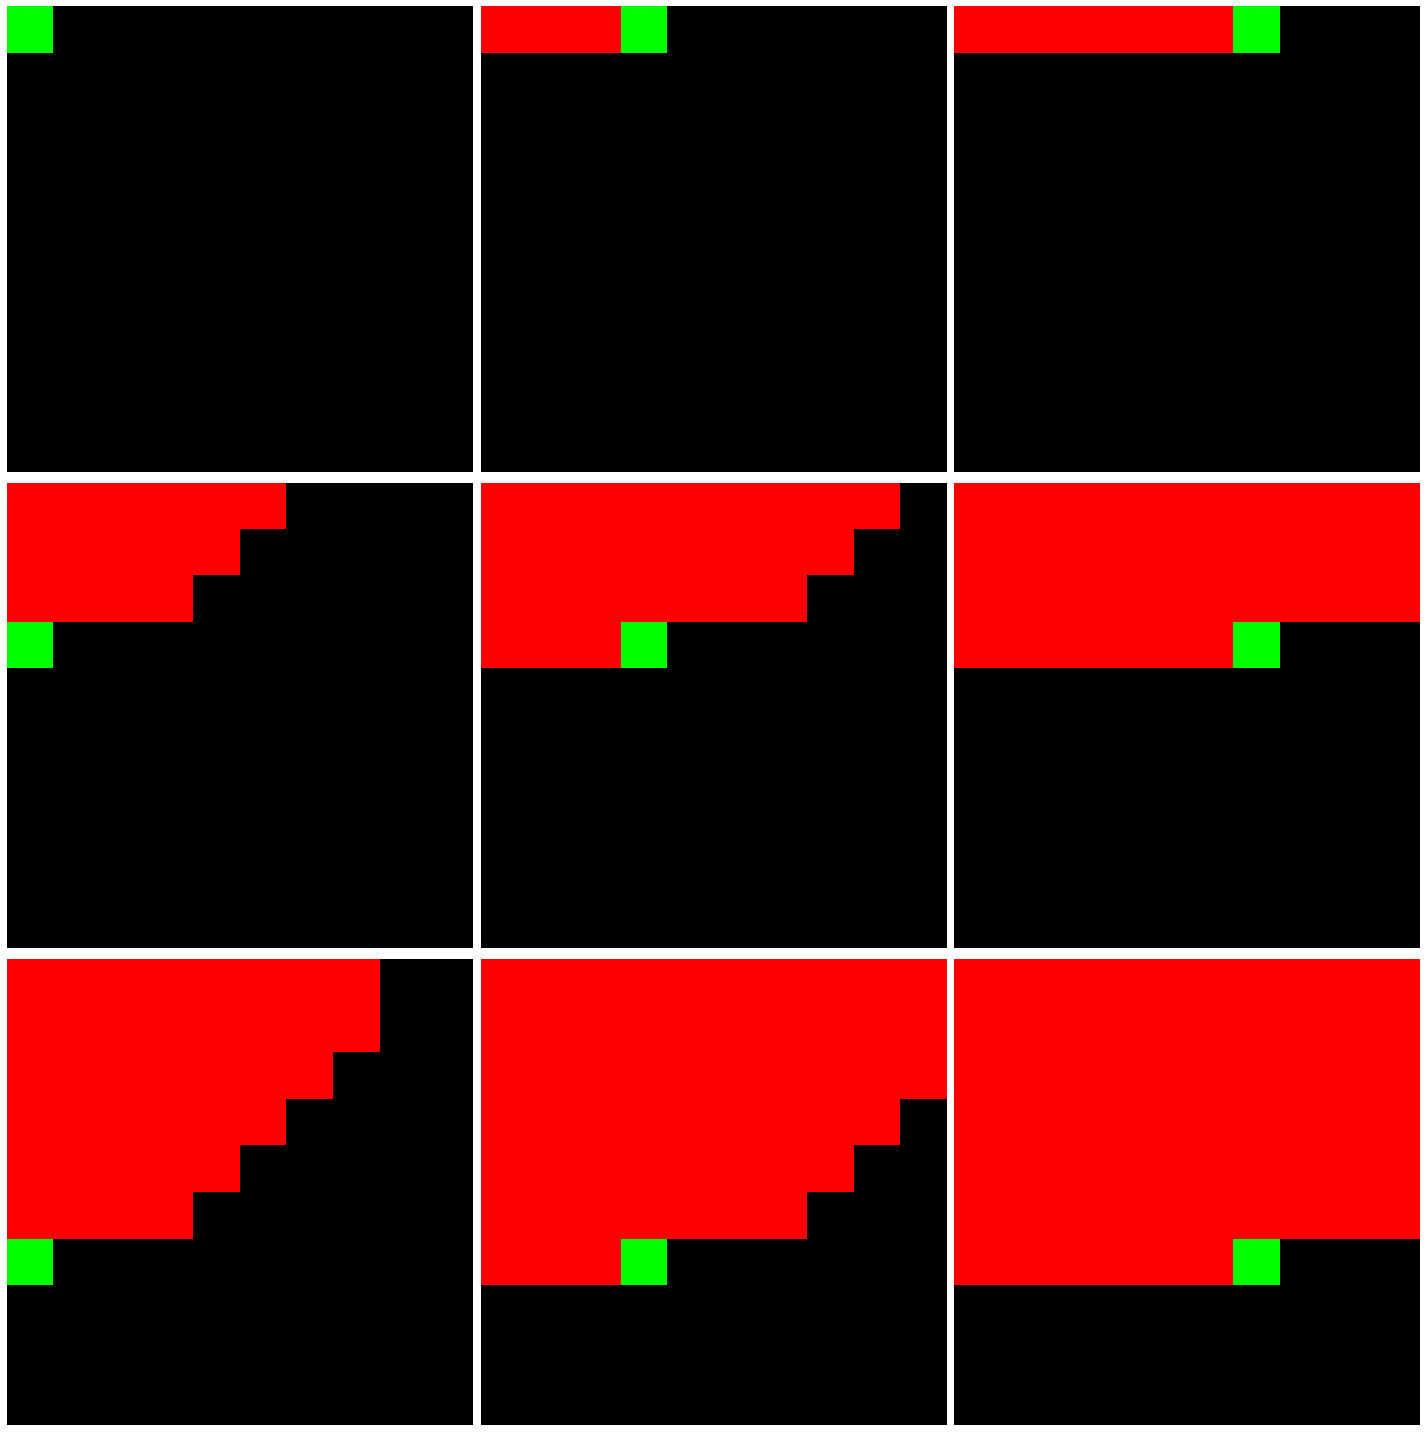

In [19]:
exp.setup()
# run backpropagation for each dimension to compute what other
# dimensions it depends on.
n_pixels = 10
x = (np.random.rand(1, 1, n_pixels, n_pixels) > 0.5).astype(np.float32)
res = []
exp.model.eval()
for i in range(n_pixels):
    for j in range(n_pixels):
        xtr = torch.tensor(x, requires_grad=True, device='cuda:0')
        xtrhat = exp.model(xtr).squeeze()[0]
        loss = xtrhat[i, j]
        loss.backward()
        
        depends = (xtr.grad[0].cpu().numpy() != 0).astype(np.uint8)
        res.append(depends)

# plot the dependency for a couple of pixels
plot_dependency_map(res, [(0,0), (0,3), (0,6),
                          (3,0), (3,3), (3,6),
                          (6,0), (6,3), (6,6)])



In [4]:
exp.run()


Config:
{
    "base_dir": "./experiment_dir",
    "batch_size": 10,
    "learning_rate": 0.001,
    "log_interval": 10,
    "n_epochs": 50,
    "name": "experiment_baseline",
    "rnd_seed": 2,
    "seed": 2,
    "use_cuda": true
}
Experiment set up.
Experiment started.
log: Train Epoch: 0 [0/22 samples (0%)]	 Batch Loss: 1.110972

Validation set: Average loss: 1.0766)

log: Train Epoch: 1 [0/22 samples (0%)]	 Batch Loss: 0.837393

Validation set: Average loss: 1.0544)

log: Train Epoch: 2 [0/22 samples (0%)]	 Batch Loss: 0.646041

Validation set: Average loss: 1.0195)

log: Train Epoch: 3 [0/22 samples (0%)]	 Batch Loss: 0.555765

Validation set: Average loss: 0.9716)

log: Train Epoch: 4 [0/22 samples (0%)]	 Batch Loss: 0.463953

Validation set: Average loss: 0.9236)

log: Train Epoch: 5 [0/22 samples (0%)]	 Batch Loss: 0.437029

Validation set: Average loss: 0.8629)

log: Train Epoch: 6 [0/22 samples (0%)]	 Batch Loss: 0.392539

Validation set: Average loss: 0.7863)

log: Train Epoc

INFO:default-qMU8ExZeJQ:Config:
INFO:default-qMU8ExZeJQ:{
    "base_dir": "./experiment_dir",
    "batch_size": 10,
    "learning_rate": 0.001,
    "log_interval": 10,
    "n_epochs": 50,
    "name": "experiment_baseline",
    "rnd_seed": 2,
    "seed": 2,
    "use_cuda": true
}
INFO:default-qMU8ExZeJQ:Experiment set up.
INFO:default-qMU8ExZeJQ:log: Train Epoch: 0 [0/22 samples (0%)]	 Batch Loss: 1.110972
INFO:default-qMU8ExZeJQ:
Validation set: Average loss: 1.0766)

INFO:default-qMU8ExZeJQ:log: Train Epoch: 1 [0/22 samples (0%)]	 Batch Loss: 0.837393
INFO:default-qMU8ExZeJQ:
Validation set: Average loss: 1.0544)

INFO:default-qMU8ExZeJQ:log: Train Epoch: 2 [0/22 samples (0%)]	 Batch Loss: 0.646041
INFO:default-qMU8ExZeJQ:
Validation set: Average loss: 1.0195)

INFO:default-qMU8ExZeJQ:log: Train Epoch: 3 [0/22 samples (0%)]	 Batch Loss: 0.555765
INFO:default-qMU8ExZeJQ:
Validation set: Average loss: 0.9716)

INFO:default-qMU8ExZeJQ:log: Train Epoch: 4 [0/22 samples (0%)]	 Batch Loss: 

In [6]:
samples = exp.model.sample(9, (10, 10), device=exp.device)

grid_len = 3
fig1, axes = plt.subplots(grid_len, grid_len, figsize=(20,20))
i = 0
for ax in axes.flat:
    if i >= len(samples):
        break
    ax.imshow(samples[i].squeeze() / (samples[i].max() + 1e-5), cmap='gray')
    ax.axis('off')
    i += 1
fig1.tight_layout()

KeyboardInterrupt: 